# TASK-1  (LINEAR REGRESSION)
## NAME - VARUN BHARDWAJ

# IMPORTING DATA

In [1]:
# IMPORTING SOME COMMON LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# DEFINING URL OF DATA
url = "http://bit.ly/w-data"
# READING DATA INTO A PANDAS DATAFRAME
data = pd.read_csv(url)
print("SUCCESSFULLY IMPORTED DATA !!")
# PRINTING DATA
print(data)

SUCCESSFULLY IMPORTED DATA !!
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


# PLOTTING DATA

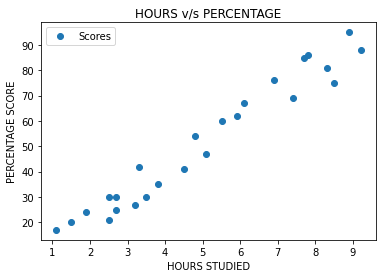

In [3]:
# PLOTTING DATA TO VISUALISE IT
## DEFINING X,Y VARIABLES AND STYLE OF PLOT
data.plot(x = 'Hours', y = 'Scores', style = 'o')
## TITLE OF THE PLOT
plt.title("HOURS v/s PERCENTAGE")
## X-AXIS LABEL
plt.xlabel("HOURS STUDIED")
## Y-AXIS LABEL
plt.ylabel("PERCENTAGE SCORE")
## PLOTTING DATA
plt.show()

# PREPARING DATA

In [4]:
# SEPARATING DATA INTO X AND Y VARIABLE
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [5]:
# IMPORTING TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split
# SPLITING DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# DEFINING AND TRAINING MODEL

In [6]:
# IMPORTING XGBOOST-REGRESSOR MODEL
from xgboost import XGBRegressor as xgbr
# DEFINING INSTANCE OF XGBOOST-REGRESSOR WITH 'GBLINEAR' BOOSTER
model = xgbr(booster='gblinear')
# FITTING TRAINING DATA INTO MODEL
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=8, num_parallel_tree=None, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
             tree_method=None, validate_parameters=1, verbosity=None)

# COMPARING HYPOTHESIS WITH ACTUAL DATA POINTS

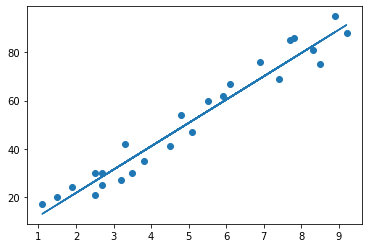

In [7]:
# PLOTTING PLOTS OF X, Y(PREDICTED BY MODEL) AND x, Y(ACTUAL)
## DEFINIG HYPOTHESIS CURVE
line = model.coef_*(X) + model.intercept_
## PLOTTING SCATTER PLOT BETWEEN X AND Y
plt.scatter(X,y)
## PLOTTING LINEAR PLOT BETWEEN X AND HYPOTHESIS CURVE
plt.plot(X,line)
# PLOTTING THE ABOVE DEFINED PLOTS
plt.show()

# MAKING PREDICTION

In [8]:
# PRINTING TEST DATA
print(X_test)
# MAKING PREDICTION ON TEST DATA
y_pred = model.predict(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


# COMPARING PREDICTION WITH ACTUAL DATA

In [9]:
# COMPARING ACTUAL AND PREDICTED DATA
# DEFINING DATAFRAME OF ACTUAL AND PREDICTED DATA
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
# PRINTING DATAFRAME
print(df)

   Actual  Predicted
0      81  83.176292
1      30  27.047291
2      21  27.047291
3      76  69.627907
4      62  59.950493


# MAKING PREDICTION ON RANDOM DATA

In [10]:
# MAKING PREDICTION ON OWN DATA
# DEFINING OWN DATA
hours = [[9.25]]
# CONVERTING LIST TO ARRAY
hours = np.array(hours)
# MAKING PREDICTION USING TRAINED MODEL
own_pred = model.predict(hours)
# PRINTING RESULT
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of Hours = [[9.25]]
Predicted Score = 92.36982727050781


# EVALUATING MODEL

In [11]:
# IMPORTING EVALUATION METRIC (MEAN ABSOLUTE ERROR)
from sklearn.metrics import mean_absolute_error as mae
# PRINTING RESULT OF EVALUATION
print("MEAN ABSOLUTE ERROR: ", mae(y_test,y_pred))

MEAN ABSOLUTE ERROR:  3.9195785522460938
